<a href="https://colab.research.google.com/github/Anjalikhillare/Sentiment_analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

**Importing data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/nlp_lab_train.txt', sep=';', names=['text','emotion'])

In [ ]:
df_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
len(df_train)

16000

In [ ]:
df_train_counts= df_train['emotion'].value_counts()
df_train_counts

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

In [ ]:
df_train_counts/sum(df_train_counts)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: emotion, dtype: float64

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/nlp_lab_val.txt', sep=';', names=['text','emotion'])
df_val.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
df_val_counts = df_val['emotion'].value_counts()
df_val_counts/sum(df_val_counts)

joy         0.3520
sadness     0.2750
anger       0.1375
fear        0.1060
love        0.0890
surprise    0.0405
Name: emotion, dtype: float64

In [ ]:
Class =df_train['emotion'].unique()
Class

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
length_array = [len(sent.split()) for sent in df_train['text']]
text_length_df = pd.DataFrame(length_array, columns=["text_length"])
text_length_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
text_length,16000.0,19.166313,10.986905,2.0,11.0,17.0,25.0,66.0


<Axes: >

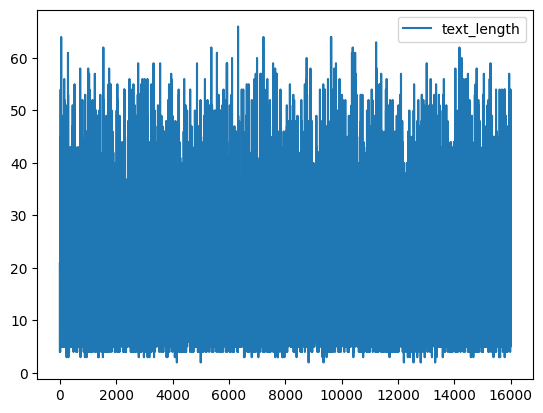

In [ ]:
text_length_df.plot(kind='line')

In [ ]:
index_90th = int(len(length_array) * 0.90)
sorted(length_array)[index_90th]

35

Since it covers 90% of the lengths in our train dataset, we'll select length 35 for our sentences.

**Loading the test dataset**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/nlp_lab_test.txt', sep=';', names=['text','emotion'])

In [ ]:
df_test.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df_test.shape

(2000, 2)

In [ ]:
df_test_counts = df_test['emotion'].value_counts()
df_test_counts, df_test_counts/sum(df_test_counts)

(joy         695
 sadness     581
 anger       275
 fear        224
 love        159
 surprise     66
 Name: emotion, dtype: int64,
 joy         0.3475
 sadness     0.2905
 anger       0.1375
 fear        0.1120
 love        0.0795
 surprise    0.0330
 Name: emotion, dtype: float64)

In [ ]:
X_test, y_test = df_test['text'], df_test['emotion']
X_test.head(), y_test.head()

(0    im feeling rather rotten so im not very ambiti...
 1            im updating my blog because i feel shitty
 2    i never make her separate from me because i do...
 3    i left with my bouquet of red and yellow tulip...
 4      i was feeling a little vain when i did this one
 Name: text, dtype: object,
 0    sadness
 1    sadness
 2    sadness
 3        joy
 4    sadness
 Name: emotion, dtype: object)

**Model**

**1 :Naive Bayes**

In [ ]:
X_train, y_train = df_train['text'], df_train['emotion']
X_train.head(10), y_train.head(10)

(0                              i didnt feel humiliated
 1    i can go from feeling so hopeless to so damned...
 2     im grabbing a minute to post i feel greedy wrong
 3    i am ever feeling nostalgic about the fireplac...
 4                                 i am feeling grouchy
 5    ive been feeling a little burdened lately wasn...
 6    ive been taking or milligrams or times recomme...
 7    i feel as confused about life as a teenager or...
 8    i have been with petronas for years i feel tha...
 9                                  i feel romantic too
 Name: text, dtype: object,
 0     sadness
 1     sadness
 2       anger
 3        love
 4       anger
 5     sadness
 6    surprise
 7        fear
 8         joy
 9        love
 Name: emotion, dtype: object)

In [ ]:
X_val, y_val = df_val['text'], df_val['emotion']
X_val.head(10), y_val.head(10)

(0    im feeling quite sad and sorry for myself but ...
 1    i feel like i am still looking at a blank canv...
 2                       i feel like a faithful servant
 3                    i am just feeling cranky and blue
 4    i can have for a treat or if i am feeling festive
 5    i start to feel more appreciative of what god ...
 6    i am feeling more confident that we will be ab...
 7    i feel incredibly lucky just to be able to tal...
 8            i feel less keen about the army every day
 9             i feel dirty and ashamed for saying that
 Name: text, dtype: object,
 0    sadness
 1    sadness
 2       love
 3      anger
 4        joy
 5        joy
 6        joy
 7        joy
 8        joy
 9    sadness
 Name: emotion, dtype: object)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
vocabulary = tfidf_vectorizer.get_feature_names_out()
vocabulary.shape

(15186,)

In [ ]:
vectorized_X_train = tfidf_vectorizer.transform(X_train)
vectorized_X_train.toarray().shape

(16000, 15186)

In [ ]:
vectorized_X_train.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nb_model= Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
nb_model

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
nb_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_nb_predictions = nb_model.predict(X_test)
model_nb_predictions

array(['sadness', 'sadness', 'sadness', ..., 'joy', 'joy', 'joy'],
      dtype='<U8')

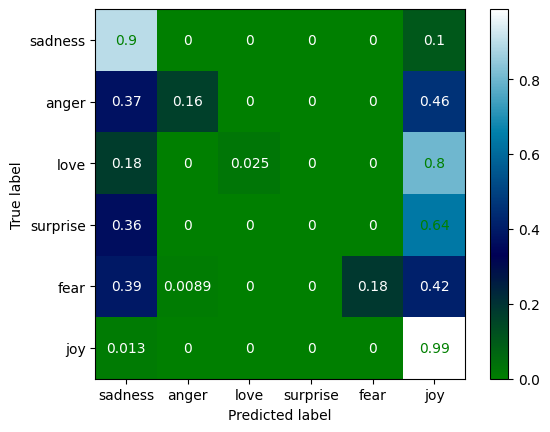

In [ ]:
def show_confusion_matrix(y_true, y_predictions):
    cm = confusion_matrix(y_true, y_predictions,
                          normalize='true',
                          labels=Class)
    ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=Class
    ).plot(cmap='ocean')

show_confusion_matrix(y_test, model_nb_predictions)

In [ ]:
def score_predictions(y_true, y_pred):
    return {
        'accuracy': balanced_accuracy_score(y_true, y_pred)
    }

score_predictions(y_test, model_nb_predictions)

{'accuracy': 0.37593490776442656}

In [ ]:
NB_score=score_predictions(y_test, model_nb_predictions)

In [ ]:
#Classification report of test data
print(classification_report(y_test,model_nb_predictions))

              precision    recall  f1-score   support

       anger       0.96      0.16      0.28       275
        fear       1.00      0.18      0.31       224
         joy       0.60      0.99      0.75       695
        love       1.00      0.03      0.05       159
     sadness       0.67      0.90      0.77       581
    surprise       0.00      0.00      0.00        66

    accuracy                           0.65      2000
   macro avg       0.71      0.38      0.36      2000
weighted avg       0.73      0.65      0.56      2000



In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy Score
nb_ascore=accuracy_score(y_test, model_nb_predictions)
nb_ascore

0.6485

**2: Feedforward Neural Network**

In [ ]:
from tensorflow.keras.layers import TextVectorization

VOCAB_SIZE = 1000
SEQUENCE_LENGTH = 35 #90th percentile of text length

vectorizer = TextVectorization(VOCAB_SIZE, output_sequence_length=SEQUENCE_LENGTH)
vectorizer.adapt(X_train)

In [ ]:
len(vectorizer.get_vocabulary())

1000

In [ ]:
vectorizer(X_train[:8000]).shape

TensorShape([8000, 35])

In [ ]:
from tensorflow.keras.layers import Embedding

EMBEDDING_DIMS = 128

def make_embedding():
    return Embedding(VOCAB_SIZE,
                     EMBEDDING_DIMS,
                     input_length=SEQUENCE_LENGTH)

embedding = make_embedding()

In [ ]:
embedding(vectorizer(X_train[:5])).shape

TensorShape([5, 35, 128])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
encoder.classes_, list(zip(y_train[:10], y_train_encoded[:10]))

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 [('sadness', 4),
  ('sadness', 4),
  ('anger', 0),
  ('love', 3),
  ('anger', 0),
  ('sadness', 4),
  ('surprise', 5),
  ('fear', 1),
  ('joy', 2),
  ('love', 3)])

In [ ]:
y_val_encoded = encoder.transform(y_val)
encoder.classes_, list(zip(y_val[:10], y_val_encoded[:10]))

(array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object),
 [('sadness', 4),
  ('sadness', 4),
  ('love', 3),
  ('anger', 0),
  ('joy', 2),
  ('joy', 2),
  ('joy', 2),
  ('joy', 2),
  ('joy', 2),
  ('sadness', 4)])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D
import tensorflow as tf

def build_model_1():
    return Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorizer,
        make_embedding(),

        GlobalAveragePooling1D(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(len(Class), activation='softmax')
    ])


feed_model = build_model_1()
feed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 35)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 35, 128)           128000    
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                

In [ ]:
feed_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

feed_model_history = feed_model.fit(X_train, y_train_encoded,
                              epochs=5,
                              validation_data=(X_val, y_val_encoded))

Epoch 1/5
500/500 [==============================] - 5s 6ms/step - loss: 1.3198 - accuracy: 0.4706 - val_loss: 0.7648 - val_accuracy: 0.7100
Epoch 2/5
500/500 [==============================] - 3s 6ms/step - loss: 0.6403 - accuracy: 0.7709 - val_loss: 0.5681 - val_accuracy: 0.8085
Epoch 3/5
500/500 [==============================] - 4s 7ms/step - loss: 0.4627 - accuracy: 0.8441 - val_loss: 0.4987 - val_accuracy: 0.8315
Epoch 4/5
500/500 [==============================] - 3s 7ms/step - loss: 0.3898 - accuracy: 0.8611 - val_loss: 0.4578 - val_accuracy: 0.8475
Epoch 5/5
500/500 [==============================] - 3s 5ms/step - loss: 0.3619 - accuracy: 0.8690 - val_loss: 0.4424 - val_accuracy: 0.8485


<Axes: >

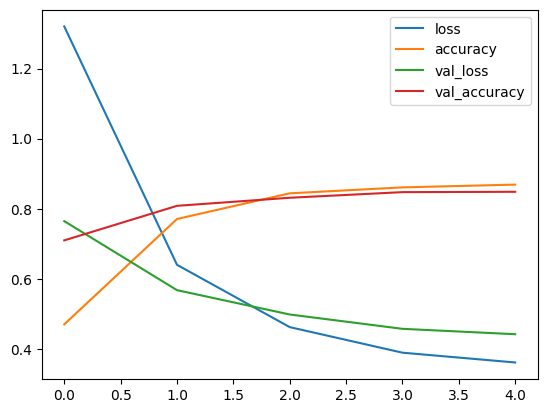

In [ ]:
pd.DataFrame(feed_model_history.history).plot()

In [ ]:
def model_predict(model, X):
    return encoder.inverse_transform(tf.math.argmax(model.predict(X), axis=1))

In [ ]:
model_ff_predictions = model_predict(feed_model, X_test)
model_ff_predictions[:10]

63/63 [==============================] - 1s 4ms/step


array(['sadness', 'sadness', 'sadness', 'joy', 'sadness', 'fear', 'anger',
       'joy', 'joy', 'anger'], dtype=object)

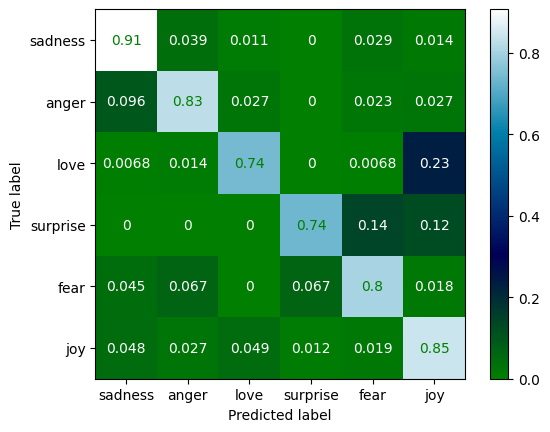

In [ ]:
show_confusion_matrix(model_ff_predictions, y_test)

In [ ]:
score_predictions(y_test, model_ff_predictions)

{'accuracy': 0.7827007853526523}

In [ ]:
FF_score=score_predictions(y_test, model_ff_predictions)

In [ ]:
print(classification_report(y_test, model_ff_predictions))

              precision    recall  f1-score   support

       anger       0.83      0.79      0.81       275
        fear       0.80      0.80      0.80       224
         joy       0.85      0.91      0.88       695
        love       0.74      0.69      0.71       159
     sadness       0.91      0.88      0.89       581
    surprise       0.74      0.64      0.68        66

    accuracy                           0.84      2000
   macro avg       0.81      0.78      0.80      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
#Accuracy Score
feed_ascore=accuracy_score(y_test, model_ff_predictions)
feed_ascore

0.845

**3: LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM

def build_model_2():
    return Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorizer,
        make_embedding(),
#         LSTM(128, return_sequences=True),
        LSTM(64),
        Dense(len(Class), activation='softmax')
    ])

lstm_model = build_model_2()
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 35)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 35, 128)           128000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                                 
Total params: 177,798
Trainable params: 177,798
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lstm_model_history = lstm_model.fit(X_train, y_train_encoded,
                              epochs=5,
                             validation_data=(X_val, y_val_encoded))

Epoch 1/5
500/500 [==============================] - 23s 40ms/step - loss: 1.4577 - accuracy: 0.3536 - val_loss: 1.2012 - val_accuracy: 0.4190
Epoch 2/5
500/500 [==============================] - 21s 42ms/step - loss: 0.9757 - accuracy: 0.5859 - val_loss: 0.6757 - val_accuracy: 0.7975
Epoch 3/5
500/500 [==============================] - 18s 36ms/step - loss: 0.5079 - accuracy: 0.8386 - val_loss: 0.4133 - val_accuracy: 0.8505
Epoch 4/5
500/500 [==============================] - 17s 35ms/step - loss: 0.3716 - accuracy: 0.8630 - val_loss: 0.3673 - val_accuracy: 0.8625
Epoch 5/5
500/500 [==============================] - 19s 39ms/step - loss: 0.3203 - accuracy: 0.8783 - val_loss: 0.3729 - val_accuracy: 0.8640


<Axes: >

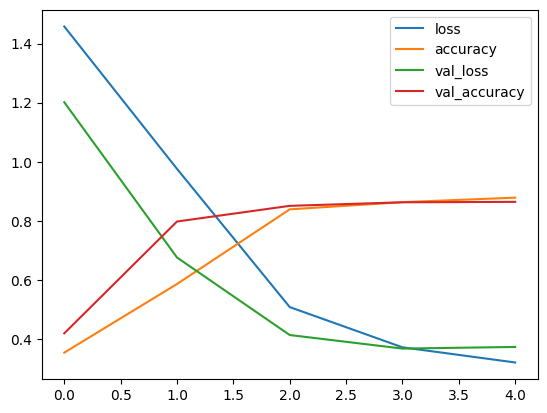

In [ ]:
pd.DataFrame(lstm_model_history.history).plot()

In [ ]:
model_lstm_rnn_predictions = model_predict(lstm_model, X_test)

pd.DataFrame(zip(X_test[:10], y_test[:10], model_lstm_rnn_predictions[:10]))

63/63 [==============================] - 1s 11ms/step


,0,1,2
0,im feeling rather rotten so im not very ambiti...,sadness,sadness
1,im updating my blog because i feel shitty,sadness,sadness
2,i never make her separate from me because i do...,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,joy,joy
4,i was feeling a little vain when i did this one,sadness,sadness
5,i cant walk into a shop anywhere where i do no...,fear,fear
6,i felt anger when at the end of a telephone call,anger,anger
7,i explain why i clung to a relationship with a...,joy,love
8,i like to have the same breathless feeling as ...,joy,joy
9,i jest i feel grumpy tired and pre menstrual w...,anger,anger


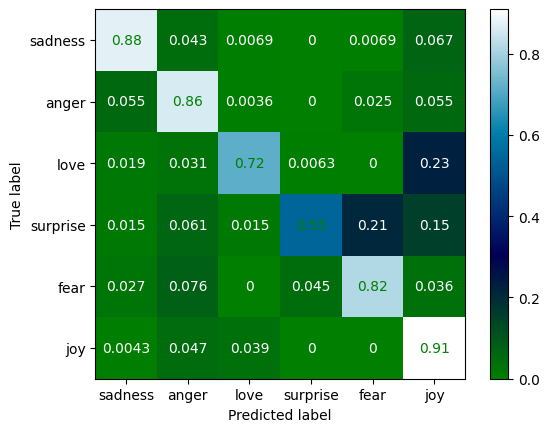

In [ ]:
show_confusion_matrix(y_test,model_lstm_rnn_predictions)

In [ ]:
score_predictions(y_test, model_lstm_rnn_predictions)

{'accuracy': 0.7877743990909188}

In [ ]:
LSTM_score=score_predictions(y_test, model_lstm_rnn_predictions)

In [ ]:
print(classification_report(y_test, model_lstm_rnn_predictions))

              precision    recall  f1-score   support

       anger       0.74      0.86      0.80       275
        fear       0.88      0.82      0.85       224
         joy       0.85      0.91      0.88       695
        love       0.78      0.72      0.75       159
     sadness       0.95      0.88      0.91       581
    surprise       0.77      0.55      0.64        66

    accuracy                           0.86      2000
   macro avg       0.83      0.79      0.80      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
#Accuracy Score
lstm_ascore=accuracy_score(y_test, model_lstm_rnn_predictions)
lstm_ascore

0.8555

**4:GRU**

In [ ]:
from tensorflow.keras.layers import GRU

def build_model_3():
    return Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorizer,
        make_embedding(),
#         GRU(128, return_sequences=True),
        GRU(64),
        Dense(len(Class), activation='softmax')
    ])

gru_model = build_model_3()
gru_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 35)               0         
 torization)                                                     
                                                                 
 embedding_7 (Embedding)     (None, 35, 128)           128000    
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_10 (Dense)            (None, 6)                 390       
                                                                 
Total params: 165,638
Trainable params: 165,638
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_gru_rnn_history = gru_model.fit(X_train, y_train_encoded,
                              epochs=5,
                              validation_data=(X_val, y_val_encoded))

Epoch 1/5
500/500 [==============================] - 21s 35ms/step - loss: 1.5839 - accuracy: 0.3311 - val_loss: 1.5808 - val_accuracy: 0.3520
Epoch 2/5
500/500 [==============================] - 16s 33ms/step - loss: 0.7608 - accuracy: 0.7009 - val_loss: 0.3347 - val_accuracy: 0.8735
Epoch 3/5
500/500 [==============================] - 17s 34ms/step - loss: 0.2927 - accuracy: 0.8794 - val_loss: 0.3104 - val_accuracy: 0.8695
Epoch 4/5
500/500 [==============================] - 17s 33ms/step - loss: 0.2570 - accuracy: 0.8908 - val_loss: 0.3277 - val_accuracy: 0.8670
Epoch 5/5
500/500 [==============================] - 20s 40ms/step - loss: 0.2345 - accuracy: 0.9007 - val_loss: 0.3232 - val_accuracy: 0.8705


<Axes: >

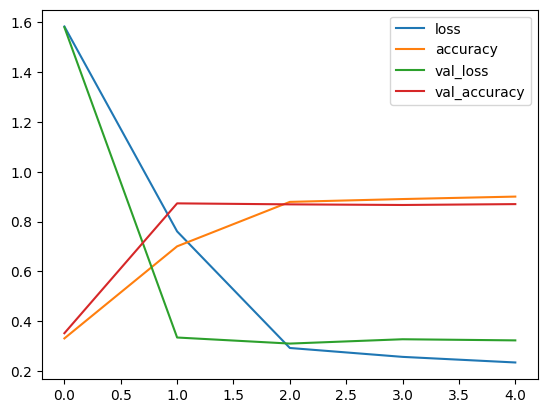

In [ ]:
pd.DataFrame(model_gru_rnn_history.history).plot()

In [ ]:
model_gru_rnn_predictions = model_predict(gru_model, X_test)
pd.DataFrame(zip(X_test[:10], y_test[:10], model_gru_rnn_predictions[:10]))

63/63 [==============================] - 3s 13ms/step


,0,1,2
0,im feeling rather rotten so im not very ambiti...,sadness,sadness
1,im updating my blog because i feel shitty,sadness,sadness
2,i never make her separate from me because i do...,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,joy,joy
4,i was feeling a little vain when i did this one,sadness,sadness
5,i cant walk into a shop anywhere where i do no...,fear,fear
6,i felt anger when at the end of a telephone call,anger,anger
7,i explain why i clung to a relationship with a...,joy,love
8,i like to have the same breathless feeling as ...,joy,joy
9,i jest i feel grumpy tired and pre menstrual w...,anger,anger


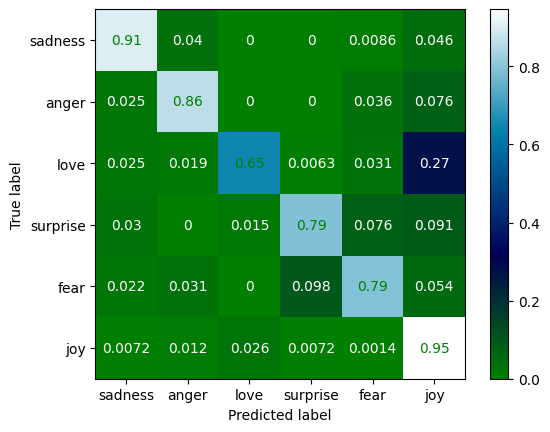

In [ ]:
show_confusion_matrix(y_test, model_gru_rnn_predictions)

In [ ]:
score_predictions(y_test, model_gru_rnn_predictions)

{'accuracy': 0.8240394645222406}

In [ ]:
GRU_score=score_predictions(y_test, model_gru_rnn_predictions)

In [ ]:
print(classification_report(y_test, model_gru_rnn_predictions))

              precision    recall  f1-score   support

       anger       0.85      0.86      0.86       275
        fear       0.87      0.79      0.83       224
         joy       0.86      0.95      0.90       695
        love       0.84      0.65      0.73       159
     sadness       0.96      0.91      0.93       581
    surprise       0.65      0.79      0.71        66

    accuracy                           0.88      2000
   macro avg       0.84      0.82      0.83      2000
weighted avg       0.88      0.88      0.88      2000



In [ ]:
#Accuracy Score
gru_ascore=accuracy_score(y_test, model_gru_rnn_predictions)
gru_ascore

0.877

**Accuracy score of Model**

In [ ]:
print("Accuracy of Naive Bayes Model :",nb_ascore*100)
print("Accuracy of Feedforward Neural Network Model :",feed_ascore*100)
print("Accuracy of LSTM Model :",lstm_ascore*100)
print("Accuracy of GRU Model :",gru_ascore*100)

Accuracy of Naive Bayes Model : 64.85
Accuracy of Feedforward Neural Network Model : 84.5
Accuracy of LSTM Model : 85.55
Accuracy of GRU Model : 87.7
